In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as  sns

In [2]:
df_kyp = pd.read_csv('kyphosis.csv')

In [3]:
df_kyp

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
df_kyp.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df_kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

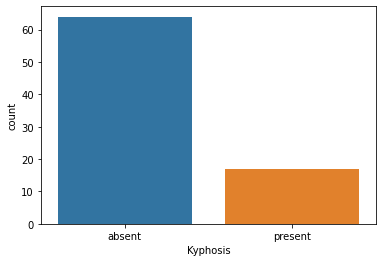

In [10]:
sns.countplot(df_kyp['Kyphosis'], label='Age')

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_y = LabelEncoder()
df_kyp['Kyphosis'] = labelEncoder_y.fit_transform(df_kyp['Kyphosis'])


In [12]:
df_kyp['Kyphosis']

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [24]:
Kyphosis_True = df_kyp[df_kyp['Kyphosis']==1]
Kyphosis_False = df_kyp[df_kyp['Kyphosis']==0]


In [25]:
Kyphosis_True

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [26]:
print('desease present after operation percentage =', int((len(Kyphosis_True)/len(df_kyp)*100)), '%')

desease present after operation percentage = 20 %


In [30]:
print('desease absent after operation persentage = ', (len(Kyphosis_False)/len(df_kyp)*100), '%')

desease absent after operation persentage =  79.01234567901234 %


<AxesSubplot:>

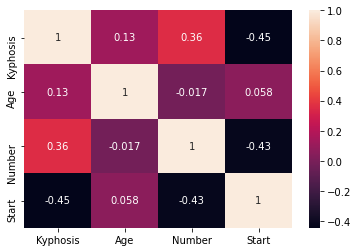

In [32]:
sns.heatmap(df_kyp.corr(), annot=True)

<AxesSubplot:>

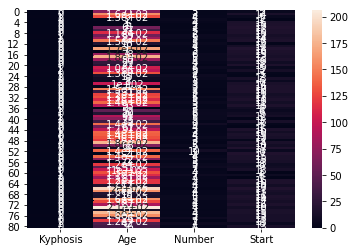

In [33]:
sns.heatmap(df_kyp, annot=True)

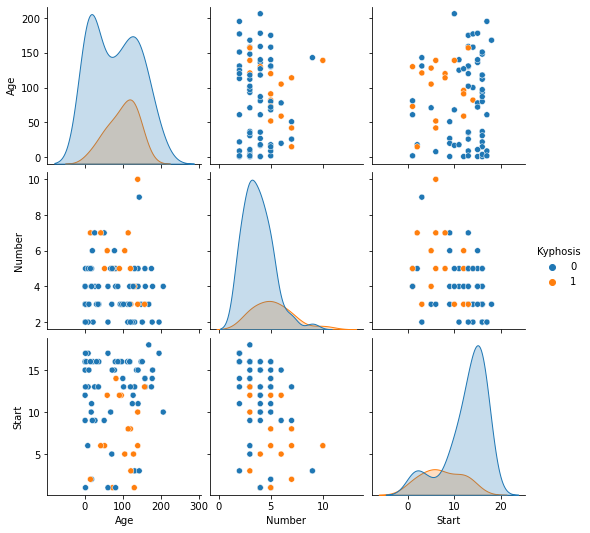

In [36]:
sns.pairplot(df_kyp, hue='Kyphosis', vars=['Age', 'Number', 'Start'])

In [37]:
df_kyp

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [38]:
X = df_kyp.drop(['Kyphosis'], axis=1)

In [39]:
y = df_kyp['Kyphosis']

In [116]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=5)

In [117]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [118]:
feature_importance = pd.DataFrame(decision_classifier.feature_importances_, index=X_train.columns, columns=['importances'])

In [119]:
feature_importance

,importances
Age,0.266433
Number,0.462297
Start,0.271271


<AxesSubplot:>

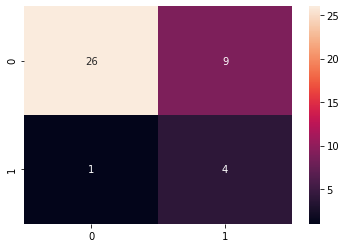

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
y_pred = decision_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        35
           1       0.31      0.80      0.44         5

    accuracy                           0.75        40
   macro avg       0.64      0.77      0.64        40
weighted avg       0.88      0.75      0.79        40



In [130]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100)
random.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot:>

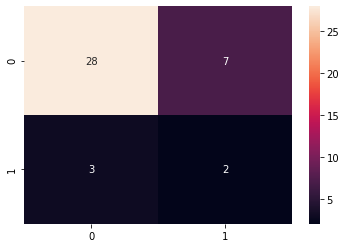

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
y_pred = random.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.27      0.60      0.37         5

    accuracy                           0.75        40
   macro avg       0.60      0.69      0.61        40
weighted avg       0.85      0.75      0.79        40

